# Breast cancer Prediction


<b>Installing the libraries</b>

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

<b>Importing Dataset</b>



In [54]:
data = pd.read_csv("breast_cancer_datasets.csv")

print(data.shape)

data.head()

(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

 
    
 <b> Droping Null value</b>
 
 
 

In [ ]:
# removing the last column as it is empty

data = data.drop('Unnamed: 32', axis = 1)

print(data.shape)

In [56]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean           ...             radius_worst  texture_worst  \
count     569.000000           ...               569.000000     569.000000   
mean        0.181162           ...                16.269190      25.677223   
std         0.027414           ...                 4.833242       6.146258   
min         0.106000           ...                 7.930000      12.020000   
25%         0.161900           ...                13.010000      21.080000   
50%         0.179200           ...                14.970000      25.410000   
75%         0.195700           ...                18.790000      29.720000   
max         0.304000           ...                36.040000      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460  
50%                   0.080040  
75%                   0.092080  
max                   0.207500  

[8 rows x 31 columns]

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [58]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [59]:
# it shows that all the data are unique that is., each and every row contains information of a cancerous cell is unique
data['id'].nunique()

569

In [60]:
# checking the different values contained in the diagnosis column
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We have to train the data in such a way that it can predict the status of the cells that whether they are M(malign) or B(Benign)

 <b>Data Visualization</b>

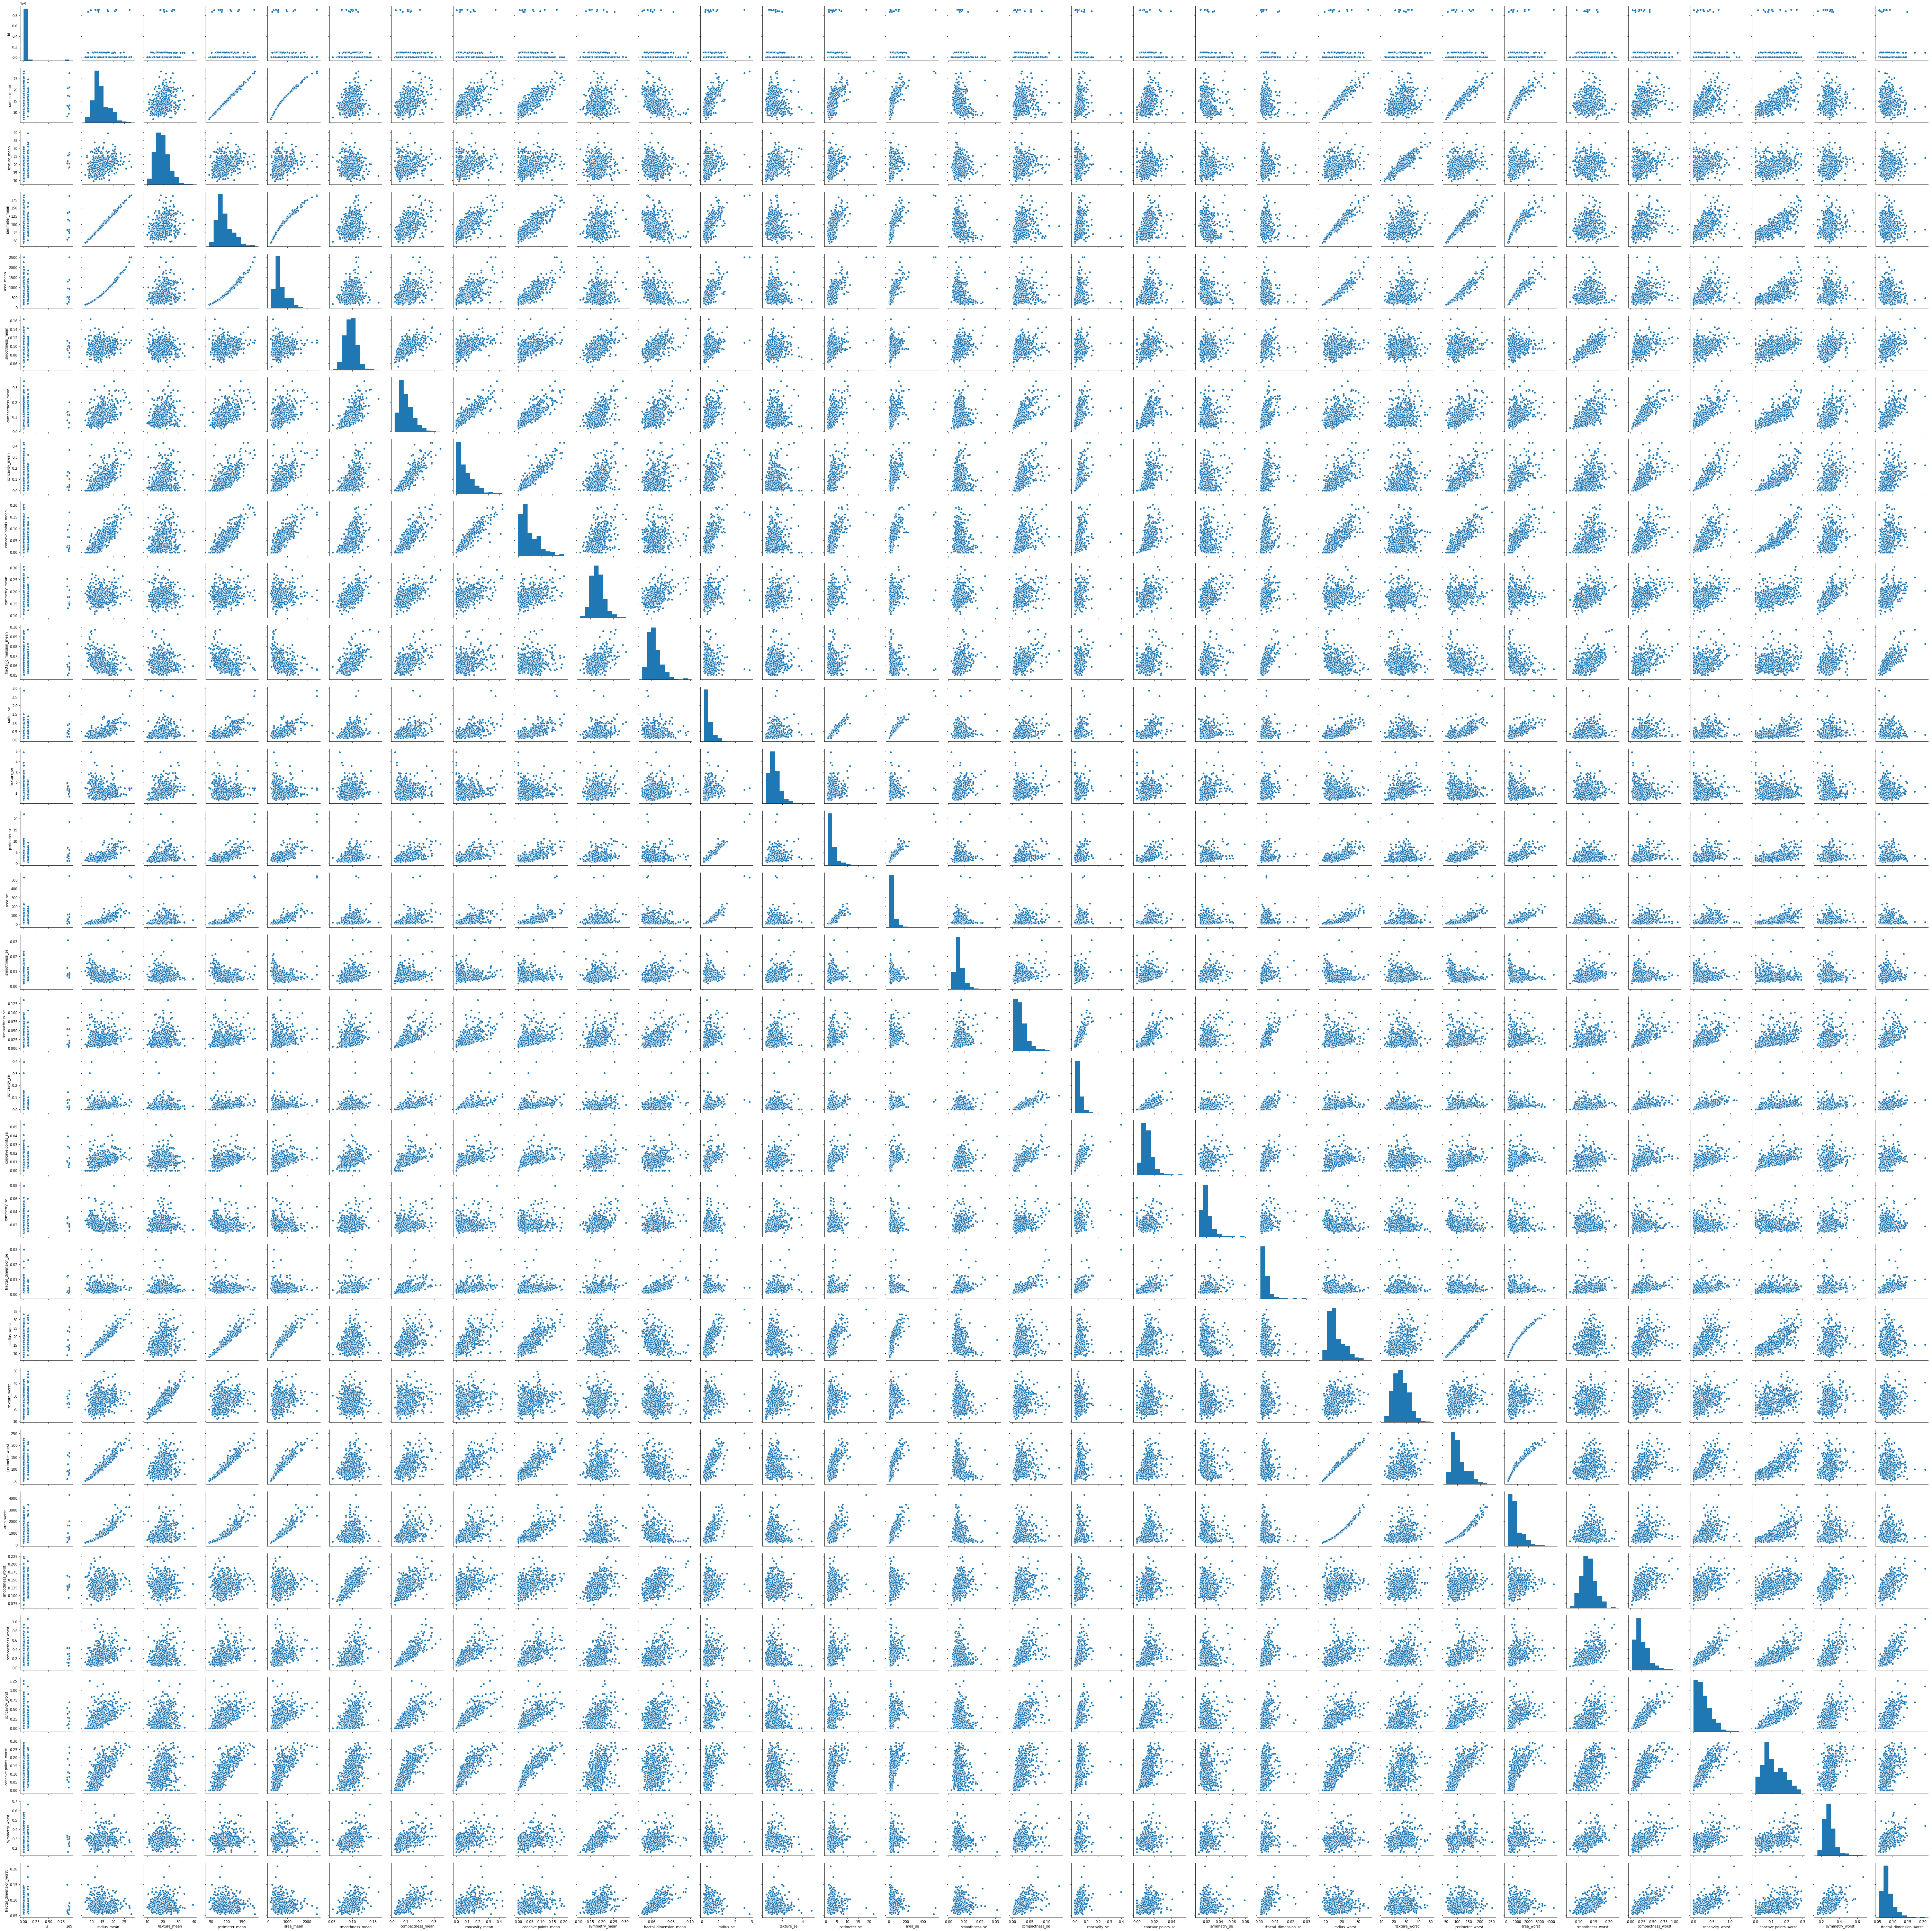

In [61]:
# plotting the pairplot

sns.pairplot(data)


 <b>Bivariate Data Analysis</b>


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Diagnosis vs radius_mean')

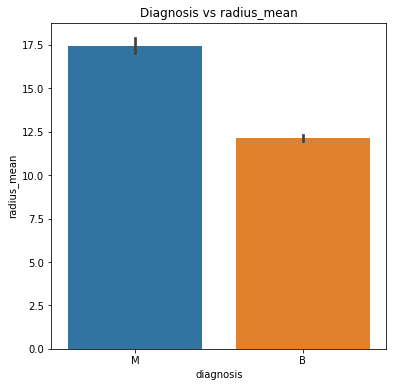

In [62]:

# from the graph, we can see that malign cells have greater radius than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'radius_mean', data = data)

plt.title('Diagnosis vs radius_mean')

In [63]:
# from the graph, we can see that malign cells have greater texture than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'texture_mean', data = data)

plt.title('Diagnosis vs texture_mean')

Text(0.5, 1.0, 'Diagnosis vs texture_mean')

In [64]:
# from the graph, we can see that malign cells have greater perimeter than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'perimeter_mean', data = data)

plt.title('Diagnosis vs perimeter_mean')

Text(0.5, 1.0, 'Diagnosis vs perimeter_mean')

Text(0.5, 1.0, 'Diagnosis vs area_mean')

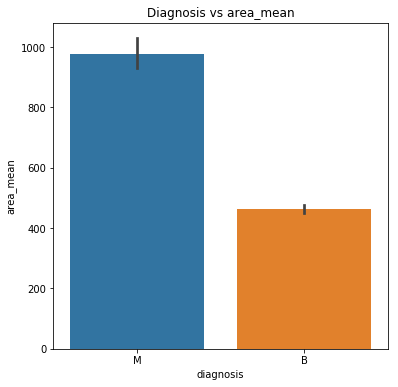

In [65]:
# from the graph, we can see that malign cells have greater area than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'area_mean', data = data)

plt.title('Diagnosis vs area_mean')

Text(0.5, 1.0, 'Diagnosis vs smoothness_mean')

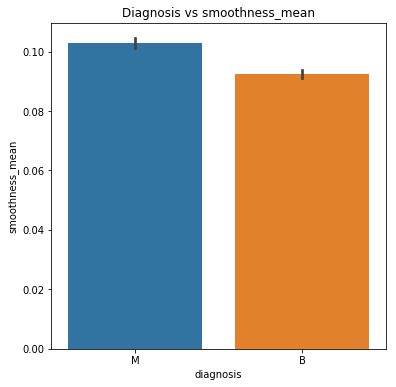

In [66]:
# from the graph, we can see that malign cells have slightly greater smoothness than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'smoothness_mean', data = data)

plt.title('Diagnosis vs smoothness_mean')

Text(0.5, 1.0, 'Diagnosis vs compactness_mean')

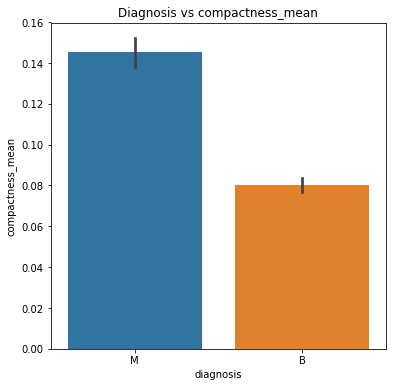

In [67]:
# from the graph, we can see that malign cells have greater compactness than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'compactness_mean', data = data)

plt.title('Diagnosis vs compactness_mean')

In [68]:

# from the graph, we can see that malign cells have greater concavity than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'concavity_mean', data = data)

plt.title('Diagnosis vs concavity_mean')

Text(0.5, 1.0, 'Diagnosis vs concavity_mean')

Text(0.5, 1.0, 'Diagnosis vs concave points_mean')

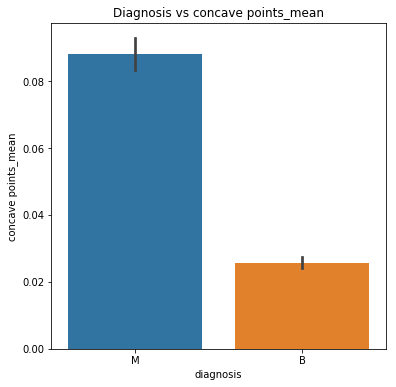

In [69]:
# from the graph, we can see that malign cells have much greater concave points_mean than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'concave points_mean', data = data)

plt.title('Diagnosis vs concave points_mean')

Text(0.5, 1.0, 'Diagnosis vs symmetry_mean')

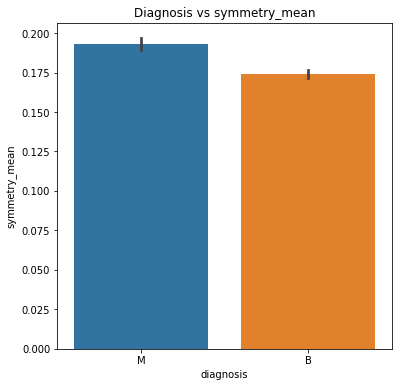

In [70]:

# from the graph, we can see that malign cells have slightly greater symmetry than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'symmetry_mean', data = data)

plt.title('Diagnosis vs symmetry_mean')

Text(0.5, 1.0, 'Diagnosis vs fractal_dimension_mean')

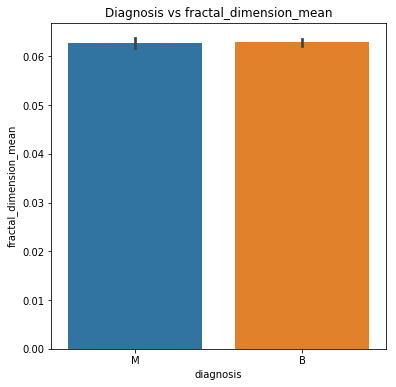

In [71]:
# from the graph, we can see that malign cells have fractal dimension mean almost equal to that of benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'fractal_dimension_mean', data = data)

plt.title('Diagnosis vs fractal_dimension_mean')


From the above ten graphs, radius_mean

mean of distances from center to points on the perimeter texture_mean

standard deviation of gray-scale values perimeter_mean

mean size of the core tumor area_mean smoothness_mean

mean of local variation in radius lengths compactness_mean

mean of perimeter^2 / area - 1.0 concavity_mean

mean of severity of concave portions of the contour concave points_mean

mean for number of concave portions of the contour symmetry_mean fractal_dimension_mean

mean for "coastline approximation" - 1

We have seen that the malign cells have higher values in comparison the benign cells in terms of mean of these parameters, and similarly rest of the 20 columns which are again standard error and worst of all these 10 parameters.

Text(0.5, 1.0, 'Diagnosis vs concavity_mean')

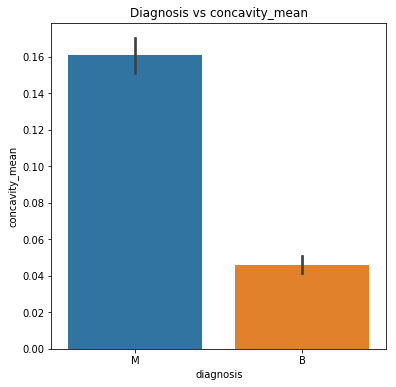

In [72]:
# from the graph, we can see that malign cells have greater concavity than benign cells in general

fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'concavity_mean', data = data)

plt.title('Diagnosis vs concavity_mean')

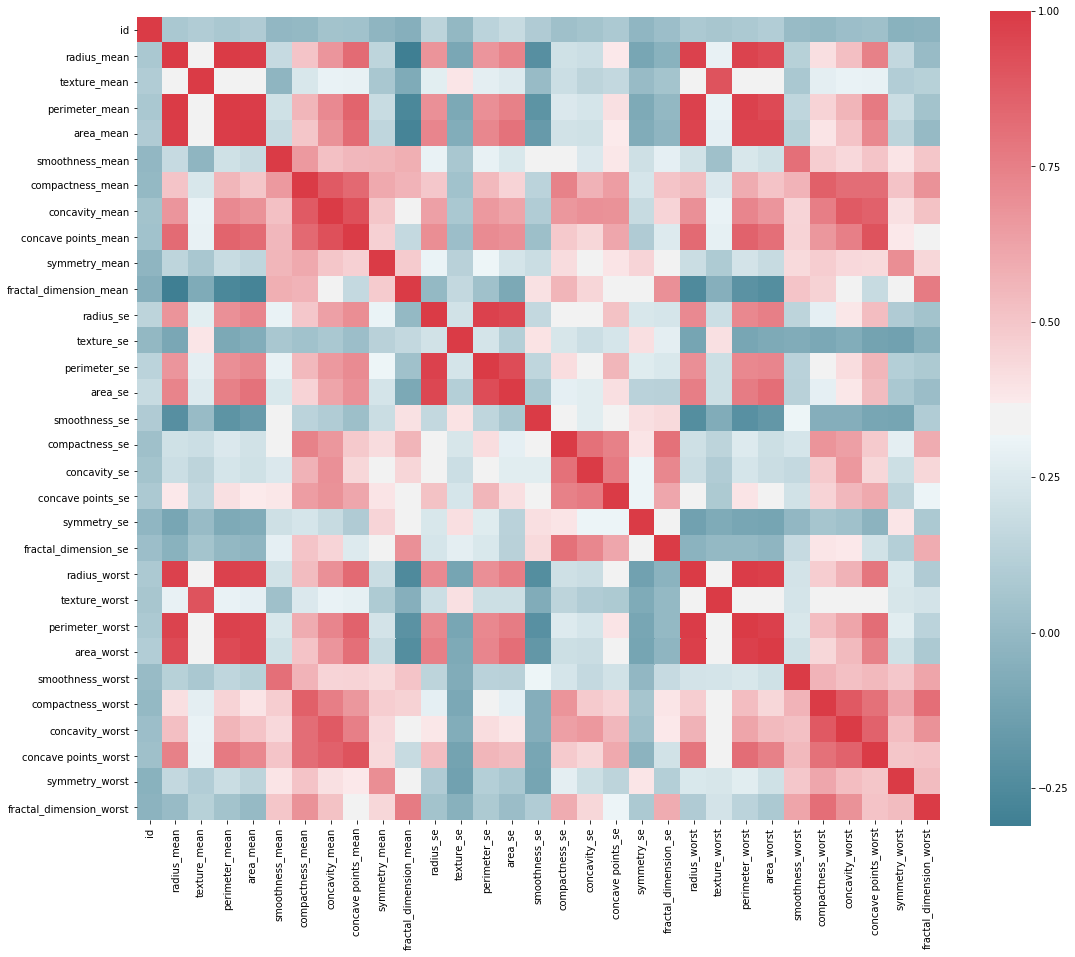

In [73]:

f, ax = plt.subplots(figsize=(18, 15))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

From the above correlation plot we can easily figure out that items which are very much related to each other and the items which are less related to each other

It tells us the degree of relativity amongst all the data items present on the dataset

For Example, fractal_dimension_mean and smoothness mean are highly related whereas texture_se and fractal-dimension_mean are very less related to each other

In [74]:

# label encoding of the dependent variable

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# converting y again to a dataframe
#y = pd.DataFrame(y)

# determining the datatype of y
#type(y)

data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [75]:
# splitting the dependent and independent variables from the dataset

x = data.iloc[:,1:]
y = data.iloc[:,0]

print(x.shape)
print(y.shape)

(569, 31)
(569,)


In [76]:
#splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 16)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(426, 31)
(426,)
(143, 31)
(143,)


In [85]:

# standard scaling 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

<b>Logistic Regression</b>

In [82]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy : 0.9624413145539906
Testing accuarcy : 0.0
              precision    recall  f1-score   support

        8913       0.00      0.00      0.00         0
        8915       0.00      0.00      0.00         1
       86355       0.00      0.00      0.00         1
       87106       0.00      0.00      0.00         1
       87164       0.00      0.00      0.00         0
       89296       0.00      0.00      0.00         1
       89346       0.00      0.00      0.00         1
       89812       0.00      0.00      0.00         1
       89869       0.00      0.00      0.00         1
       90250       0.00      0.00      0.00         0
       91504       0.00      0.00      0.00         1
       91505       0.00      0.00      0.00         1
       91805       0.00      0.00      0.00         1
       91858       0.00      0.00      0.00         0
       92751       0.00      0.00      0.00         0
      842302       0.00      0.00      0.00         1
      842517       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit

<b>Support Vector Machine</b>

In [86]:
from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.0
              precision    recall  f1-score   support

        8915       0.00      0.00      0.00         1
       85715       0.00      0.00      0.00         0
       86355       0.00      0.00      0.00         1
       86517       0.00      0.00      0.00         0
       87106       0.00      0.00      0.00         1
       87163       0.00      0.00      0.00         0
       87164       0.00      0.00      0.00         0
       87930       0.00      0.00      0.00         0
       89122       0.00      0.00      0.00         0
       89296       0.00      0.00      0.00         1
       89346       0.00      0.00      0.00         1
       89812       0.00      0.00      0.00         1
       89827       0.00      0.00      0.00         0
       89869       0.00      0.00      0.00         1
       90312       0.00      0.00      0.00         0
       91504       0.00      0.00      0.00         1
       91505       0.00      0.00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit

In [88]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 0.8, gamma = 0.1, kernel = 'linear')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

print("Testing accuarcy :", model.score(x_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit

              precision    recall  f1-score   support

        8915       0.00      0.00      0.00         1
       85715       0.00      0.00      0.00         0
       86355       0.00      0.00      0.00         1
       86517       0.00      0.00      0.00         0
       87106       0.00      0.00      0.00         1
       87163       0.00      0.00      0.00         0
       87164       0.00      0.00      0.00         0
       87930       0.00      0.00      0.00         0
       89122       0.00      0.00      0.00         0
       89296       0.00      0.00      0.00         1
       89346       0.00      0.00      0.00         1
       89812       0.00      0.00      0.00         1
       89827       0.00      0.00      0.00         0
       89869       0.00      0.00      0.00         1
       90312       0.00      0.00      0.00         0
       91504       0.00      0.00      0.00         1
       91505       0.00      0.00      0.00         1
       91805       0.00    

Testing accuarcy : 0.0


<b>Random Forest</b>

In [89]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 0.9483568075117371
Testing accuarcy : 0.0
              precision    recall  f1-score   support

        8670       0.00      0.00      0.00         0
        8913       0.00      0.00      0.00         0
        8915       0.00      0.00      0.00         1
        9047       0.00      0.00      0.00         0
       85715       0.00      0.00      0.00         0
       86355       0.00      0.00      0.00         1
       86408       0.00      0.00      0.00         0
       87106       0.00      0.00      0.00         1
       89122       0.00      0.00      0.00         0
       89296       0.00      0.00      0.00         1
       89346       0.00      0.00      0.00         1
       89812       0.00      0.00      0.00         1
       89869       0.00      0.00      0.00         1
       90251       0.00      0.00      0.00         0
       91227       0.00      0.00      0.00         0
       91504       0.00      0.00      0.00         1
       91505       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit

<b>Decision Forest</b>

In [91]:
from sklearn.tree import DecisionTreeClassifier

# creating a model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.0
              precision    recall  f1-score   support

        8915       0.00      0.00      0.00         1
       85715       0.00      0.00      0.00         0
       86355       0.00      0.00      0.00         1
       87106       0.00      0.00      0.00         1
       89296       0.00      0.00      0.00         1
       89346       0.00      0.00      0.00         1
       89812       0.00      0.00      0.00         1
       89869       0.00      0.00      0.00         1
       91504       0.00      0.00      0.00         1
       91505       0.00      0.00      0.00         1
       91550       0.00      0.00      0.00         0
       91805       0.00      0.00      0.00         1
      842302       0.00      0.00      0.00         1
      842517       0.00      0.00      0.00         1
      843786       0.00      0.00      0.00         1
      844981       0.00      0.00      0.00         0
      846226       0.00      0.00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit

<b>
Neural Networks

Multi Layer Perceptron</b>

In [92]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = (200, 200), max_iter = 200)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training accuracy : 1.0
Testing accuarcy : 0.0
              precision    recall  f1-score   support

        8915       0.00      0.00      0.00         1
       85715       0.00      0.00      0.00         0
       86208       0.00      0.00      0.00         0
       86355       0.00      0.00      0.00         1
       86561       0.00      0.00      0.00         0
       87106       0.00      0.00      0.00         1
       87880       0.00      0.00      0.00         0
       87930       0.00      0.00      0.00         0
       89296       0.00      0.00      0.00         1
       89344       0.00      0.00      0.00         0
       89346       0.00      0.00      0.00         1
       89812       0.00      0.00      0.00         1
       89869       0.00      0.00      0.00         1
       91227       0.00      0.00      0.00         0
       91485       0.00      0.00      0.00         0
       91504       0.00      0.00      0.00         1
       91505       0.00      0.00 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramDat